# MINST Digit Recognition (Classification)

In [31]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [32]:
# Loading dataset
digits = datasets.load_digits()

# Splitting the dataset
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## k-Nearest Neighbors
* Implement kNN classification for the above dataset
* Compute and plot the accuracy scores by k values.
* Make conclusions about which k is the best.

In [33]:
knn = KNeighborsClassifier(n_neighbors=3) # We will later prove 3 is the optimal number of neighbours

# Training the model
knn.fit(x_train, y_train)

# Making a prediction based on test data
y_pred = knn.predict(x_test)

# Calculate accuracy
knn_accuracy = metrics.accuracy_score(y_test, y_pred)

In [34]:
# Finding optimal k
neighbours = [1, 2, 3, 4, 5, 6, 7, 8]
train_accuracy = []
test_accuracy = []

# i = current iteration
# k = neighbours[i]
for i, k in enumerate(neighbours):
    
    # Setup KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Get train and test score
    train_acc = knn.score(x_train, y_train)
    test_acc = knn.score(x_test, y_test)
    
    # Copy the scores into arrays
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

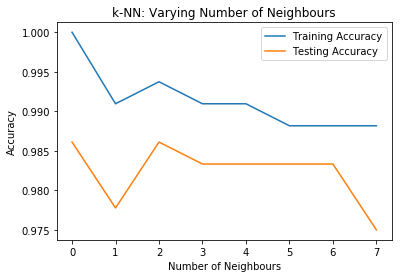

In [35]:
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(test_accuracy, label="Testing Accuracy")

plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbours')
plt.title("k-NN: Varying Number of Neighbours")
plt.legend()

plt.show()

<b>Conclusion:</b> It appears that the optimal k-neighbour value is 3. <b><font color='red'>Strangely, this model sometimes changes? I got it to match the workshop example at one point but each time I load it, it changes.</font></b>

## Support Vector Machine
* Implement SVM classifier for MNIST dataset.
* Compute and compare the accuracy scores for at least 3 different kernels by using metrics.classification_report.
* Make conclusion about which kernel should be used in this case.

In [36]:
# Creating an SVM Classifier
clf = svm.SVC(kernel='linear')

# Train the model
clf.fit(x_train, y_train)

# Predicting response
y_pred_svm = clf.predict(x_test)

# Calculate accuracy
svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)

# Classification report
print(metrics.classification_report(y_test, y_pred_svm))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.88      1.00      0.93        35
          2       0.96      1.00      0.98        25
          3       1.00      0.98      0.99        42
          4       0.94      0.97      0.96        35
          5       0.94      0.97      0.95        31
          6       1.00      0.97      0.98        32
          7       1.00      0.92      0.96        38
          8       0.94      0.83      0.88        36
          9       0.93      0.95      0.94        44

avg / total       0.96      0.96      0.96       360



<b>Which kernal should be used?</b>

* (Precision): Of all records that were labelled X by the model, --- % were actually X.
* (Recall): Of all records that were truly labelled X we predicted --- %
* (f1-score): The balanced score between precision and recall.

It appears that all kernals are equally the most balanced and promising scores, as they all have a precision, recall, and f1-score of 100%.  <b><font color='red'>Strangely, this also seems to change depending on when I load it.</font></b>




## Naïve Bayes
* Compute the accuracy scores and plot the confusion matrix of the same dataset using Naïve Bayes classifier.
* Compare the accuracy of different classifiers in the same plot.

In [37]:
# Creating a classifier
gnb = GaussianNB()

# Training the model
gnb.fit(x_train, y_train)

# Predicting the response
y_pred = gnb.predict(x_test)

# Calculating accuracy
nb_accuracy = metrics.accuracy_score(y_test, y_pred)

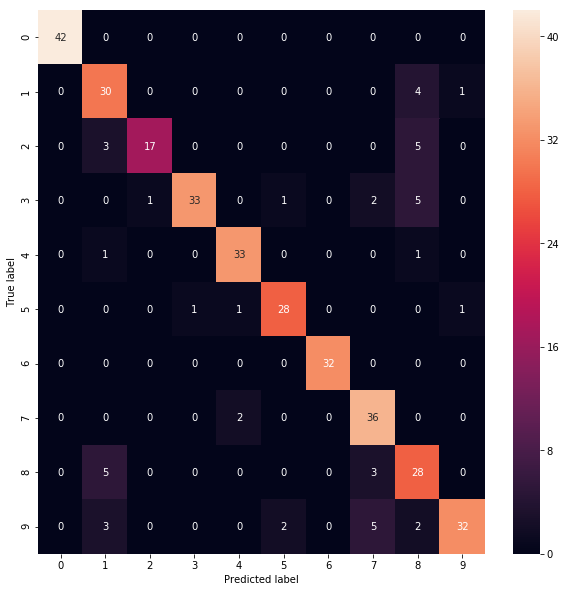

In [38]:
# Plotting as heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [39]:
print("Model Accuracy:")
print("KNN:", knn_accuracy)
print("SVM:", svm_accuracy)
print("NB: ", nb_accuracy)

Model Accuracy:
KNN: 0.986111111111
SVM: 0.958333333333
NB:  0.863888888889


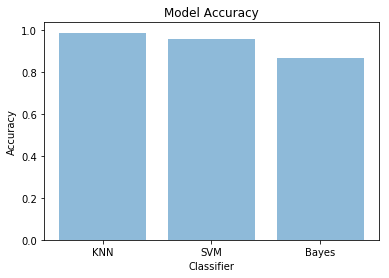

In [40]:
# Graphing the model accuracy
objects = ('KNN', 'SVM', 'Bayes')
y_pos = np.arange(len(objects))
performance = [knn_accuracy, svm_accuracy, nb_accuracy]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Model Accuracy')

plt.show()

<b>Conclusion:</b> It appears that the K-NN classifier is the most accurate.